In [3]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15, 10)
import datetime
import re

In [4]:
def to_millis(h, m, s, mi, re):
    return (((h*60 + m)*60 + s)*1000 + mi + re) 

In [32]:
output = """\
05:01:02:000:0 / wind_speed /   1500.00000
06:01:03:000:0 / radiation /   4500.00000
LP 0: starting simulation (NoTime).
### this->charge: 0
delta is 1.11111e-06
Time to availability: 25:00:00:000:0
01:00:01:000:0 0 (ext) sent by 3
### this->charge: 5.33444
delta is 0.000417778
Time to availability: 00:03:46:593:0.078125
02:20:02:000:0 5.33444 (ext) sent by 4
02:23:48:593:0.078125 100 (int)
### this->charge: 256.014
delta is -0.000415556
02:30:02:030:0 256.014 (ext) sent by 22110336
02:40:18:105:0.625 0 (int)
02:44:17:467:0.328125 100 (int)
### this->charge: 0
delta is -0.000394444
03:00:03:000:0 0 (ext) sent by 3
03:00:03:000:0 0 (int)
03:03:50:848:0.09375 100 (int)
### this->charge: 0
delta is -0.000411111
04:01:01:000:0 0 (ext) sent by 3
04:01:01:000:0 0 (int)
04:04:57:842:0.109375 100 (int)
### this->charge: 0
delta is -0.0134667
04:30:01:000:0 0 (ext) sent by 22110336
04:30:01:000:0 0 (int)
04:33:57:842:0.109375 100 (int)
### this->charge: 0
delta is -0.0134667
05:01:02:000:0 0 (ext) sent by 4
05:01:02:000:0 0 (int)
05:04:58:842:0.109375 100 (int)
### this->charge: 0
delta is -0.0134222
06:01:03:000:0 0 (ext) sent by 3
06:01:03:000:0 0 (int)
06:04:37:285:0.71875 100 (int)
Simulation complete!
Simulation ended!
LP 0 has finished simualtion
"""

data = [x.split()[:3] for x in output.split("\n") if re.match(".*\((ext|int)\).*$", x)]

In [33]:
data

[['01:00:01:000:0', '0', '(ext)'],
 ['02:20:02:000:0', '5.33444', '(ext)'],
 ['02:23:48:593:0.078125', '100', '(int)'],
 ['02:30:02:030:0', '256.014', '(ext)'],
 ['02:40:18:105:0.625', '0', '(int)'],
 ['02:44:17:467:0.328125', '100', '(int)'],
 ['03:00:03:000:0', '0', '(ext)'],
 ['03:00:03:000:0', '0', '(int)'],
 ['03:03:50:848:0.09375', '100', '(int)'],
 ['04:01:01:000:0', '0', '(ext)'],
 ['04:01:01:000:0', '0', '(int)'],
 ['04:04:57:842:0.109375', '100', '(int)'],
 ['04:30:01:000:0', '0', '(ext)'],
 ['04:30:01:000:0', '0', '(int)'],
 ['04:33:57:842:0.109375', '100', '(int)'],
 ['05:01:02:000:0', '0', '(ext)'],
 ['05:01:02:000:0', '0', '(int)'],
 ['05:04:58:842:0.109375', '100', '(int)'],
 ['06:01:03:000:0', '0', '(ext)'],
 ['06:01:03:000:0', '0', '(int)'],
 ['06:04:37:285:0.71875', '100', '(int)']]

In [34]:
processed = [
    (to_millis(*map(float, t.split(':'))), float(v))
    for t, v, p in data
]

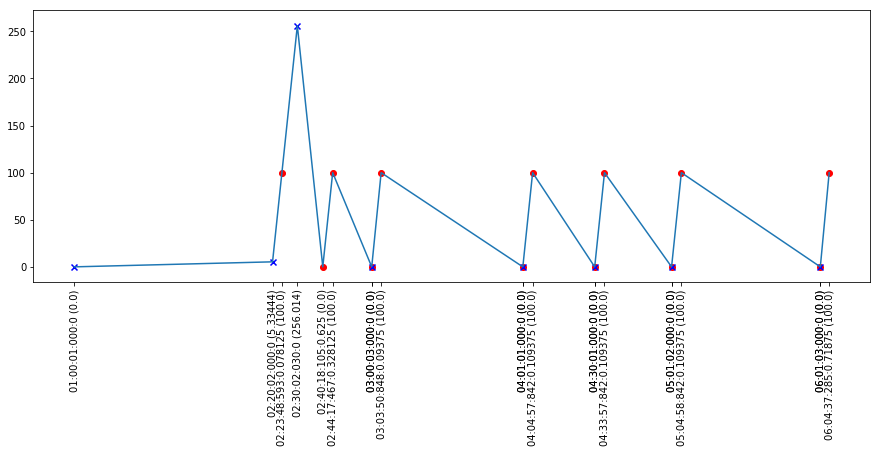

In [35]:
plt.figure(figsize=(15, 5))
plt.plot(*zip(*processed))
for marker, event, color in [('o', '(int)', 'r'), ('x', '(ext)', 'b')]:
    plt.scatter(*zip(*[x for (x,d) in zip(processed, data) if d[2] == event]), marker=marker, color=color)

plt.xticks(
    [x[0] for x in processed], 
    ["{} ({})".format(x[0], y[1]) for x,y in zip(data, processed)], 
    rotation='vertical'
)
pass

In [10]:
list(zip(*[x for (x,d) in zip(processed, data) if d[2] == '(int)']))

[(8628593.078125,
  9618105.625,
  9857467.328125,
  10803000.0,
  11030848.09375,
  14461000.0,
  14697842.109375,
  16201000.0,
  16437842.109375,
  18062000.0,
  18298842.109375,
  21663000.0,
  21877285.71875),
 (100.0,
  0.0,
  100.0,
  0.0,
  100.0,
  0.0,
  100.0,
  0.0,
  100.0,
  0.0,
  100.0,
  0.0,
  100.0)]

In [ ]:
data[]